<a href="https://colab.research.google.com/github/nisha1365/GEN-AI-POC/blob/main/RSV_BTM_3_Section_18th_March.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tweet-preprocessor

In [2]:
!pip install bertopic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.1/154.1 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 27.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 12.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.5/156.5 kB 20.2 MB/s eta 0:00:00
  Using cached Cython-0.29.37-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 43.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 63.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 55.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/73

In [3]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
# import tweet preprocessor
import preprocessor as p

import nltk
import gensim
import re
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from bertopic import BERTopic
#from sklearn.decomposition import PCA
from sentence_transformers import SentenceTransformer
from umap import UMAP
from hdbscan import HDBSCAN
#from sklearn.cluster import KMeans
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
import gensim.corpora as corpora
from gensim.models.coherencemodel import CoherenceModel
from bertopic.vectorizers import ClassTfidfTransformer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [4]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [6]:
data= pd.read_csv("/content/RSV_cleaned_tweets_18th_March.csv")
data

tweet_id                                               text  \
0      1638593073839054874  @DoomScroling Vaccine needles are too skinny f...   
1      1638833275140702208  @VelvetPimpson @jonesville @EndWokeness @laura...   
2      1638833710387666944  @cannibalized3 @AlwaysRed56 @BattleObsessed Va...   
3      1638593580729081856  @ZelenskyyUa You need to end your pedophilia, ...   
4      1638594246788751374  These guns in the hands of kids for which we d...   
...                    ...                                                ...   
60424  1653043358011387906  @Mellycat6 @frandeebee Same here, it horrifies...   
60425  1653078464050741272  Dr Maria Gutschi from EU giving expert witness...   
60426  1653043428224057346  @DrSHankMD Shame &amp; guilt. I failed my only...   
60427  1653078466693152782  @BANigeria, in collaboration with the Ebonyi S...   
60428  1653078470577078285  The celebration was an opportunity to highligh...   

                 author_id           created_at lang  referenced_tweets_type  \
0      1341195501123809283  2023-03-22 17:26:47   en                       2   
1                877620883  2023-03-23 09:21:15   en                       2   
2               2675084048  2023-03-23 09:22:59   en                       2   
3      1605728234523566081  2023-03-22 17:28:47   en                       2   
4      1484375700702253062  2023-03-22 17:31:26   en                       3   
...                    ...                  ...  ...                     ...   
60424             19948132  2023-05-01 14:27:03   en                       2   
60425             93112589  2023-05-01 16:46:33   en                       0   
60426  1346219019745906688  2023-05-01 14:27:20   en                       2   
60427  1117776886686470145  2023-05-01 16:46:33   en                       0   
60428  1117776886686470145  2023-05-01 16:46:34   en                       2   

       referenced_tweets_id infos  association_tweet_id  association_scope_id  \
0       1638254766424748035    {}   1638593073839054874                     1   
1       1638822075803795457    {}   1638833275140702208                     1   
2       1638738342782312448    {}   1638833710387666944                     1   
3       1638498087051116545    {}   1638593580729081856                     1   
4       1638590109887938560    {}   1638594246788751374                     1   
...                     ...   ...                   ...                   ...   
60424   1652929284875378688    {}   1653043358011387906                     1   
60425                     0    {}   1653078464050741272                     1   
60426   1652672153911697408    {}   1653043428224057346                     1   
60427                     0    {}   1653078466693152782                     1   
60428   1653078466693152782    {}   1653078470577078285                     1   

       scope_id scope_name           scope_date  \
0             1        RSV  2023-03-23 00:00:00   
1             1        RSV  2023-03-23 00:00:00   
2             1        RSV  2023-03-23 00:00:00   
3             1        RSV  2023-03-23 00:00:00   
4             1        RSV  2023-03-23 00:00:00   
...         ...        ...                  ...   
60424         1        RSV  2023-03-23 00:00:00   
60425         1        RSV  2023-03-23 00:00:00   
60426         1        RSV  2023-03-23 00:00:00   
60427         1        RSV  2023-03-23 00:00:00   
60428         1        RSV  2023-03-23 00:00:00   

                                              scope_info  \
0      {'keywords': ['RSV vaccination', 'child vaccin...   
1      {'keywords': ['RSV vaccination', 'child vaccin...   
2      {'keywords': ['RSV vaccination', 'child vaccin...   
3      {'keywords': ['RSV vaccination', 'child vaccin...   
4      {'keywords': ['RSV vaccination', 'child vaccin...   
...                                                  ...   
60424  {'keywords': ['RSV vaccination', 'child vaccin...   
60425  {'keywords'

In [7]:
data.columns

Index(['tweet_id', 'text', 'author_id', 'created_at', 'lang',
       'referenced_tweets_type', 'referenced_tweets_id', 'infos',
       'association_tweet_id', 'association_scope_id', 'scope_id',
       'scope_name', 'scope_date', 'scope_info', 'clean_text'],
      dtype='object')

In [8]:
data_tweet = data[['author_id', 'tweet_id', 'text', 'clean_text', 'created_at', 'referenced_tweets_type']]
data_tweet

author_id             tweet_id  \
0      1341195501123809283  1638593073839054874   
1                877620883  1638833275140702208   
2               2675084048  1638833710387666944   
3      1605728234523566081  1638593580729081856   
4      1484375700702253062  1638594246788751374   
...                    ...                  ...   
60424             19948132  1653043358011387906   
60425             93112589  1653078464050741272   
60426  1346219019745906688  1653043428224057346   
60427  1117776886686470145  1653078466693152782   
60428  1117776886686470145  1653078470577078285   

                                                    text  \
0      @DoomScroling Vaccine needles are too skinny f...   
1      @VelvetPimpson @jonesville @EndWokeness @laura...   
2      @cannibalized3 @AlwaysRed56 @BattleObsessed Va...   
3      @ZelenskyyUa You need to end your pedophilia, ...   
4      These guns in the hands of kids for which we d...   
...                                                  ...   
60424  @Mellycat6 @frandeebee Same here, it horrifies...   
60425  Dr Maria Gutschi from EU giving expert witness...   
60426  @DrSHankMD Shame &amp; guilt. I failed my only...   
60427  @BANigeria, in collaboration with the Ebonyi S...   
60428  The celebration was an opportunity to highligh...   

                                              clean_text           created_at  \
0      vaccine needles are too skinny for that device...  2023-03-22 17:26:47   
1      never got measles vaccine. still haven't got i...  2023-03-23 09:21:15   
2      vaccines causing autism was perpetuated by a c...  2023-03-23 09:22:59   
3      you need to end your pedophilia, child/human/s...  2023-03-22 17:28:47   
4      these guns in the hands of kids for which we d...  2023-03-22 17:31:26   
...                                                  ...                  ...   
60424  same here, it horrifies me especially putting ...  2023-05-01 14:27:03   
60425  dr maria gutschi from eu giving expert witness...  2023-05-01 16:46:33   
60426  shame &amp; guilt. i failed my only child by v...  2023-05-01 14:27:20   
60427  , in collaboration with the ebonyi state prima...  2023-05-01 16:46:33   
60428  the celebration was an opportunity to highligh...  2023-05-01 16:46:34   

       referenced_tweets_type  
0                           2  
1                           2  
2                           2  
3                           2  
4                           3  
...                       ...  
60424                       2  
60425                       0  
60426                       2  
60427                       0  
60428                       2  

[60429 rows x 6 columns]

In [9]:
data_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60429 entries, 0 to 60428
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   author_id               60429 non-null  int64 
 1   tweet_id                60429 non-null  int64 
 2   text                    60429 non-null  object
 3   clean_text              60429 non-null  object
 4   created_at              60429 non-null  object
 5   referenced_tweets_type  60429 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 2.8+ MB


In [10]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [11]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def remove_stopwords(text):
    # Tokenize the text
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token.lower() not in stop_words]

    # Join tokens back into a string
    filtered_text = ' '.join(tokens)

    return filtered_text

In [12]:
# Remove stopwords from the "clean_text" column
data_tweet['clean_text'] = data_tweet['clean_text'].apply(remove_stopwords)
data_tweet

author_id             tweet_id  \
0      1341195501123809283  1638593073839054874   
1                877620883  1638833275140702208   
2               2675084048  1638833710387666944   
3      1605728234523566081  1638593580729081856   
4      1484375700702253062  1638594246788751374   
...                    ...                  ...   
60424             19948132  1653043358011387906   
60425             93112589  1653078464050741272   
60426  1346219019745906688  1653043428224057346   
60427  1117776886686470145  1653078466693152782   
60428  1117776886686470145  1653078470577078285   

                                                    text  \
0      @DoomScroling Vaccine needles are too skinny f...   
1      @VelvetPimpson @jonesville @EndWokeness @laura...   
2      @cannibalized3 @AlwaysRed56 @BattleObsessed Va...   
3      @ZelenskyyUa You need to end your pedophilia, ...   
4      These guns in the hands of kids for which we d...   
...                                                  ...   
60424  @Mellycat6 @frandeebee Same here, it horrifies...   
60425  Dr Maria Gutschi from EU giving expert witness...   
60426  @DrSHankMD Shame &amp; guilt. I failed my only...   
60427  @BANigeria, in collaboration with the Ebonyi S...   
60428  The celebration was an opportunity to highligh...   

                                              clean_text           created_at  \
0      vaccine needles skinny device , happens valve ...  2023-03-22 17:26:47   
1      never got measles vaccine . still n't got . th...  2023-03-23 09:21:15   
2      vaccines causing autism perpetuated child abus...  2023-03-23 09:22:59   
3      need end pedophilia , child/human/sex traffick...  2023-03-22 17:28:47   
4      guns hands kids vaccine . continue multiply vi...  2023-03-22 17:31:26   
...                                                  ...                  ...   
60424  , horrifies especially putting arms babies/chi...  2023-05-01 14:27:03   
60425  dr maria gutschi eu giving expert witness test...  2023-05-01 16:46:33   
60426  shame & amp ; guilt . failed child vaccinating...  2023-05-01 14:27:20   
60427  , collaboration ebonyi state primary health ca...  2023-05-01 16:46:33   
60428  celebration opportunity highlight collective a...  2023-05-01 16:46:34   

       referenced_tweets_type  
0                           2  
1                           2  
2                           2  
3                           2  
4                           3  
...                       ...  
60424                       2  
60425                       0  
60426                       2  
60427                       0  
60428                       2  

[60429 rows x 6 columns]

In [13]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

def lemmatize_text(text):
  """Lemmatizes a text.

  Args:
    text: The text to lemmatize.

  Returns:
    The lemmatized text.
  """

  words = nltk.word_tokenize(text)
  lemmas = [nltk.WordNetLemmatizer().lemmatize(word) for word in words]
  return " ".join(lemmas)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [14]:
data_tweet['new_lemma_text'] = data_tweet["clean_text"].apply(lemmatize_text)
data_tweet

author_id             tweet_id  \
0      1341195501123809283  1638593073839054874   
1                877620883  1638833275140702208   
2               2675084048  1638833710387666944   
3      1605728234523566081  1638593580729081856   
4      1484375700702253062  1638594246788751374   
...                    ...                  ...   
60424             19948132  1653043358011387906   
60425             93112589  1653078464050741272   
60426  1346219019745906688  1653043428224057346   
60427  1117776886686470145  1653078466693152782   
60428  1117776886686470145  1653078470577078285   

                                                    text  \
0      @DoomScroling Vaccine needles are too skinny f...   
1      @VelvetPimpson @jonesville @EndWokeness @laura...   
2      @cannibalized3 @AlwaysRed56 @BattleObsessed Va...   
3      @ZelenskyyUa You need to end your pedophilia, ...   
4      These guns in the hands of kids for which we d...   
...                                                  ...   
60424  @Mellycat6 @frandeebee Same here, it horrifies...   
60425  Dr Maria Gutschi from EU giving expert witness...   
60426  @DrSHankMD Shame &amp; guilt. I failed my only...   
60427  @BANigeria, in collaboration with the Ebonyi S...   
60428  The celebration was an opportunity to highligh...   

                                              clean_text           created_at  \
0      vaccine needles skinny device , happens valve ...  2023-03-22 17:26:47   
1      never got measles vaccine . still n't got . th...  2023-03-23 09:21:15   
2      vaccines causing autism perpetuated child abus...  2023-03-23 09:22:59   
3      need end pedophilia , child/human/sex traffick...  2023-03-22 17:28:47   
4      guns hands kids vaccine . continue multiply vi...  2023-03-22 17:31:26   
...                                                  ...                  ...   
60424  , horrifies especially putting arms babies/chi...  2023-05-01 14:27:03   
60425  dr maria gutschi eu giving expert witness test...  2023-05-01 16:46:33   
60426  shame & amp ; guilt . failed child vaccinating...  2023-05-01 14:27:20   
60427  , collaboration ebonyi state primary health ca...  2023-05-01 16:46:33   
60428  celebration opportunity highlight collective a...  2023-05-01 16:46:34   

       referenced_tweets_type  \
0                           2   
1                           2   
2                           2   
3                           2   
4                           3   
...                       ...   
60424                       2   
60425                       0   
60426                       2   
60427                       0   
60428                       2   

                                          new_lemma_text  
0      vaccine needle skinny device , happens valve t...  
1      never got measles vaccine . still n't got . th...  
2      vaccine causing autism perpetuated child abuse...  
3      need end pedophilia , child/human/sex traffick...  
4      gun hand kid vaccine . continue multiply victi...  
...                                                  ...  
60424  , horrifies especially putting arm babies/chil...  
60425  dr maria gutschi eu giving expert witness test...  
60426  shame & amp ; guilt . failed child vaccinating...  
60427  , collaboration ebonyi state primary health ca...  
60428  celebration opportunity highlight collective a...  

[60429 rows x 7 columns]

In [15]:
data_tweet['referenced_tweets_type'].value_counts()

2    31934
0    22528
3     5967
Name: referenced_tweets_type, dtype: int64

# tweet_type_2


In [17]:
tweet_type_2 = data_tweet[data_tweet['referenced_tweets_type']  == 2]
tweet_type_2

author_id             tweet_id  \
0      1341195501123809283  1638593073839054874   
1                877620883  1638833275140702208   
2               2675084048  1638833710387666944   
3      1605728234523566081  1638593580729081856   
5       825321618851377153  1638834059257450497   
...                    ...                  ...   
60419  1432039657936728065  1653101166497243136   
60421            541878477  1653078167932813312   
60424             19948132  1653043358011387906   
60426  1346219019745906688  1653043428224057346   
60428  1117776886686470145  1653078470577078285   

                                                    text  \
0      @DoomScroling Vaccine needles are too skinny f...   
1      @VelvetPimpson @jonesville @EndWokeness @laura...   
2      @cannibalized3 @AlwaysRed56 @BattleObsessed Va...   
3      @ZelenskyyUa You need to end your pedophilia, ...   
5      @JonBell61123722 @finland_uk @WhithouseDavid @...   
...                                                  ...   
60419  @itsDaibhi He has been fighting the good fight...   
60421  @stengel Parents also have freedoms. Like:\n- ...   
60424  @Mellycat6 @frandeebee Same here, it horrifies...   
60426  @DrSHankMD Shame &amp; guilt. I failed my only...   
60428  The celebration was an opportunity to highligh...   

                                              clean_text           created_at  \
0      vaccine needles skinny device , happens valve ...  2023-03-22 17:26:47   
1      never got measles vaccine . still n't got . th...  2023-03-23 09:21:15   
2      vaccines causing autism perpetuated child abus...  2023-03-23 09:22:59   
3      need end pedophilia , child/human/sex traffick...  2023-03-22 17:28:47   
5      child age zero risk covid nowhere near vaccine...  2023-03-23 09:24:22   
...                                                  ...                  ...   
60419  fighting good fight kids vaccine research year...  2023-05-01 18:16:45   
60421  parents also freedoms . like : - freedom child...  2023-05-01 16:45:22   
60424  , horrifies especially putting arms babies/chi...  2023-05-01 14:27:03   
60426  shame & amp ; guilt . failed child vaccinating...  2023-05-01 14:27:20   
60428  celebration opportunity highlight collective a...  2023-05-01 16:46:34   

       referenced_tweets_type  \
0                           2   
1                           2   
2                           2   
3                           2   
5                           2   
...                       ...   
60419                       2   
60421                       2   
60424                       2   
60426                       2   
60428                       2   

                                          new_lemma_text  
0      vaccine needle skinny device , happens valve t...  
1      never got measles vaccine . still n't got . th...  
2      vaccine causing autism perpetuated child abuse...  
3      need end pedophilia , child/human/sex traffick...  
5      child age zero risk covid nowhere near vaccine...  
...                                                  ...  
60419  fighting good fight kid vaccine research year ...  
60421  parent also freedom . like : - freedom child e...  
60424  , horrifies especially putting arm babies/chil...  
60426  shame & amp ; guilt . failed child vaccinating...  
60428  celebration opportunity highlight collective a...  

[31934 rows x 7 columns]

#bert topic on tweet_type_2:

In [18]:
#Extract embeddings
embedding_model = SentenceTransformer("all-MiniLM-L6-v2")

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [19]:
# Reduce dimensionality
umap_model = UMAP(n_neighbors=15, n_components=5, min_dist=0.0, metric='cosine',random_state=100)

In [20]:
#Cluster reduced embeddings
hdbscan_model = HDBSCAN(min_cluster_size=15,min_samples = 5, metric='euclidean', cluster_selection_method='eom', prediction_data=True)

In [21]:
vectorizer_model = CountVectorizer(stop_words="english")

In [22]:
ctfidf_model = ClassTfidfTransformer()

In [24]:
from bertopic import BERTopic
from bertopic.representation import MaximalMarginalRelevance

representation_model = MaximalMarginalRelevance(diversity=0.3)

topic_model_2 = BERTopic(
  embedding_model=embedding_model,    # Step 1 - Extract embeddings
  umap_model=umap_model,              # Step 2 - Reduce dimensionality
  hdbscan_model=hdbscan_model,        # Step 3 - Cluster reduced embeddings
  vectorizer_model=vectorizer_model,  # Step 4 - Tokenize topics
  ctfidf_model=ctfidf_model,          # Step 5 - Extract topic words
  representation_model=representation_model,
  nr_topics='auto',
  low_memory=True,
  n_gram_range=(1, 3),
  calculate_probabilities=True,
  verbose=True,
)

In [25]:
tweet_list_2 = tweet_type_2.new_lemma_text.tolist()

In [26]:
topics, probs = topic_model_2.fit_transform(tweet_list_2)

2024-03-18 07:19:01,599 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/998 [00:00<?, ?it/s]

2024-03-18 07:19:19,939 - BERTopic - Embedding - Completed ✓
2024-03-18 07:19:19,941 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-03-18 07:20:24,860 - BERTopic - Dimensionality - Completed ✓
2024-03-18 07:20:24,862 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-03-18 07:22:55,060 - BERTopic - Cluster - Completed ✓
2024-03-18 07:22:55,062 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-03-18 07:23:01,815 - BERTopic - Representation - Completed ✓
2024-03-18 07:23:01,817 - BERTopic - Topic reduction - Reducing number of topics
2024-03-18 07:23:07,745 - BERTopic - Topic reduction - Reduced number of topics from 252 to 167


In [27]:
topic_model_2.get_topic_info()

Topic  Count                                    Name  \
0       -1  14613               -1_vaccine_kid_covid_risk   
1        0   7505                 0_vaccine_covid_kid_vax   
2        1    710         1_autism_autistic_mmr_wakefield   
3        2    407        2_measles_rubella_mumps_outbreak   
4        3    380    3_polio_paralyzed_disease_poliovirus   
..     ...    ...                                     ...   
162    161     15      161_eua_approved_legal_infornation   
163    162     15      162_purifier_disinfect_filter_hepa   
164    163     15  163_narcolepsy_pandemrix_swine_mocking   
165    164     15                 164_cfl_nhl_graf_immune   
166    165     15   165_watergate_scale_destruction_fraud   

                                        Representation  \
0    [vaccine, kid, covid, risk, school, vaccinated...   
1    [vaccine, covid, kid, vax, risk, mandate, pfiz...   
2    [autism, autistic, mmr, wakefield, diagnosed, ...   
3    [measles, rubella, mumps, outbreak, disease, p...   
4    [polio, paralyzed, disease, poliovirus, africa...   
..                                                 ...   
162  [eua, approved, legal, infornation, astrazenec...   
163  [purifier, disinfect, filter, hepa, isolate, c...   
164  [narcolepsy, pandemrix, swine, mocking, nafo, ...   
165  [cfl, nhl, graf, immune, infecting, masked, ha...   
166  [watergate, scale, destruction, fraud, lie, mi...   

                                   Representative_Docs  
0    [people know ’ vaccinated little kid covid sti...  
1    [compared vaccine mandate right kill unborn ba...  
2    [thing healthy vaccine ! link vaccine autism ....  
3    [’ like kid . measles vaccine , get measles ge...  
4    [never `` vaccine `` . got polio vaccine kid ....  
..                                                 ...  
162  [nobody taking eua version ( emergency use aut...  
163  [prevent spread covid19 : isolate testing [ + ...  
164  [’ adorable mocking ill people . mock victim l...  
165  ['m immune compromised ( graf ) , work ft & am...  
166  [scale political lie fraud around safety effec...  

[167 rows x 5 columns]

In [29]:
docs = tweet_list_2
# Preprocess Documents
documents = pd.DataFrame({"Document": docs,
                          "ID": range(len(docs)),
                          "Topic": topics})
documents_per_topic = documents.groupby(['Topic'], as_index=False).agg({'Document': ' '.join})
cleaned_docs = topic_model_2._preprocess_text(documents_per_topic.Document.values)

# Extract vectorizer and analyzer from BERTopic
vectorizer = topic_model_2.vectorizer_model
analyzer = vectorizer.build_analyzer()

# Extract features for Topic Coherence evaluation
words = vectorizer.get_feature_names_out()
tokens = [analyzer(doc) for doc in cleaned_docs]
dictionary = corpora.Dictionary(tokens)
corpus = [dictionary.doc2bow(token) for token in tokens]

topic_words = [[words for words, _ in topic_model_2.get_topic(topic) if words!='']
               for topic in range(len(set(topics))-1)]

# Evaluate
coherence_model = CoherenceModel(topics=topic_words,
                                 texts=tokens,
                                 corpus=corpus,
                                 dictionary=dictionary,
                                 coherence='c_v')
coherence = coherence_model.get_coherence()
print(coherence)

0.6037111585729213


In [30]:
# Find indices of tweets assigned to Topic 1
topic_unclustered_2_indices = [index for index, topic_label in enumerate(topics) if topic_label == -1]

# Display tweets assigned to Topic 1
tweets_topic_unclustered_2 = tweet_type_2.iloc[topic_unclustered_2_indices, :7]
print("Tweets assigned to Topic -1:")
tweets_topic_unclustered_2

Tweets assigned to Topic -1:


author_id             tweet_id  \
0      1341195501123809283  1638593073839054874   
9                410527228  1638835133225611264   
12               104451886  1638595254021685248   
15     1577554738207690753  1638837756771147778   
19     1518814455965970432  1638841443405164546   
...                    ...                  ...   
60408             14629987  1653182794103681025   
60409  1518693954618748928  1653182960173219840   
60410  1588847388373880832  1653183672957423616   
60416   952550192909357057  1653186056433352717   
60419  1432039657936728065  1653101166497243136   

                                                    text  \
0      @DoomScroling Vaccine needles are too skinny f...   
9      @savyrecords They just need the child’s record...   
12     @KamalaHarris unless it is a vaccine.  unless ...   
15     @ammishraLFC @BhavikaKapoor5 Kid that would ha...   
19     @logic_quantum @fatsandwich20 @wootongueclan @...   
...                                                  ...   
60408  @stevewmobb @NateB_Panic Yeah, I posed a "vacc...   
60409  @atrupar My Mother got the Covid vaccine. Almo...   
60410  @ZaidJilani @assliken The role of children was...   
60416  @DiedSuddenly_ This boy probably had liberal p...   
60419  @itsDaibhi He has been fighting the good fight...   

                                              clean_text           created_at  \
0      vaccine needles skinny device , happens valve ...  2023-03-22 17:26:47   
9      need child ’ records date . ’ telll means need...  2023-03-23 09:28:38   
12     unless vaccine . unless gender assignment child .  2023-03-22 17:35:26   
15     kid would done congress yeah vaccine made priv...  2023-03-23 09:39:04   
19     72 shots currently childhood vaccine program…....  2023-03-23 09:53:42   
...                                                  ...                  ...   
60408  yeah , posed `` vaccine misinfo costs lives ''...  2023-05-01 23:41:07   
60409  mother got covid vaccine . almost immediately ...  2023-05-01 23:41:47   
60410  role children pawns mostly obese mostly female...  2023-05-01 23:44:36   
60416  boy probably liberal parents forced get covid ...  2023-05-01 23:54:05   
60419  fighting good fight kids vaccine research year...  2023-05-01 18:16:45   

       referenced_tweets_type  \
0                           2   
9                           2   
12                          2   
15                          2   
19                          2   
...                       ...   
60408                       2   
60409                       2   
60410                       2   
60416                       2   
60419                       2   

                                          new_lemma_text  
0      vaccine needle skinny device , happens valve t...  
9      need child ’ record date . ’ telll mean need l...  
12     unless vaccine . unless gender assignment child .  
15     kid would done congress yeah vaccine made priv...  
19     72 shot currently childhood vaccine program….a...  
...                                                  ...  
60408  yeah , posed `` vaccine misinfo cost life `` f...  
60409  mother got covid vaccine . almost immediately ...  
60410  role child pawn mostly obese mostly female tea...  
60416  boy probably liberal parent forced get covid v...  
60419  fighting good fight kid vaccine research year ...  

[14613 rows x 7 columns]

In [32]:
tweets_topic_unclustered_2.to_csv("RSV_unclustered_from_2_18th_March.csv", index = False)

In [33]:
print(len(tweets_topic_unclustered_2))

14613


In [34]:
merged_2 = pd.merge(data_tweet, tweets_topic_unclustered_2, how = 'outer', indicator = True)
data_tweet = merged_2[merged_2['_merge'] == 'left_only'].drop(columns = '_merge')
data_tweet

author_id             tweet_id  \
1                877620883  1638833275140702208   
2               2675084048  1638833710387666944   
3      1605728234523566081  1638593580729081856   
4      1484375700702253062  1638594246788751374   
5       825321618851377153  1638834059257450497   
...                    ...                  ...   
60424             19948132  1653043358011387906   
60425             93112589  1653078464050741272   
60426  1346219019745906688  1653043428224057346   
60427  1117776886686470145  1653078466693152782   
60428  1117776886686470145  1653078470577078285   

                                                    text  \
1      @VelvetPimpson @jonesville @EndWokeness @laura...   
2      @cannibalized3 @AlwaysRed56 @BattleObsessed Va...   
3      @ZelenskyyUa You need to end your pedophilia, ...   
4      These guns in the hands of kids for which we d...   
5      @JonBell61123722 @finland_uk @WhithouseDavid @...   
...                                                  ...   
60424  @Mellycat6 @frandeebee Same here, it horrifies...   
60425  Dr Maria Gutschi from EU giving expert witness...   
60426  @DrSHankMD Shame &amp; guilt. I failed my only...   
60427  @BANigeria, in collaboration with the Ebonyi S...   
60428  The celebration was an opportunity to highligh...   

                                              clean_text           created_at  \
1      never got measles vaccine . still n't got . th...  2023-03-23 09:21:15   
2      vaccines causing autism perpetuated child abus...  2023-03-23 09:22:59   
3      need end pedophilia , child/human/sex traffick...  2023-03-22 17:28:47   
4      guns hands kids vaccine . continue multiply vi...  2023-03-22 17:31:26   
5      child age zero risk covid nowhere near vaccine...  2023-03-23 09:24:22   
...                                                  ...                  ...   
60424  , horrifies especially putting arms babies/chi...  2023-05-01 14:27:03   
60425  dr maria gutschi eu giving expert witness test...  2023-05-01 16:46:33   
60426  shame & amp ; guilt . failed child vaccinating...  2023-05-01 14:27:20   
60427  , collaboration ebonyi state primary health ca...  2023-05-01 16:46:33   
60428  celebration opportunity highlight collective a...  2023-05-01 16:46:34   

       referenced_tweets_type  \
1                           2   
2                           2   
3                           2   
4                           3   
5                           2   
...                       ...   
60424                       2   
60425                       0   
60426                       2   
60427                       0   
60428                       2   

                                          new_lemma_text  
1      never got measles vaccine . still n't got . th...  
2      vaccine causing autism perpetuated child abuse...  
3      need end pedophilia , child/human/sex traffick...  
4      gun hand kid vaccine . continue multiply victi...  
5      child age zero risk covid nowhere near vaccine...  
...                                                  ...  
60424  , horrifies especially putting arm babies/chil...  
60425  dr maria gutschi eu giving expert witness test...  
60426  shame & amp ; guilt . failed child vaccinating...  
60427  , collaboration ebonyi state primary health ca...  
60428  celebration opportunity highlight collective a...  

[45816 rows x 7 columns]

# tweet_type_3:

In [36]:
tweet_type_3 = data_tweet[data_tweet['referenced_tweets_type']  == 3]
tweet_type_3

author_id             tweet_id  \
4      1484375700702253062  1638594246788751374   
29     1519476252800917504  1638597127453417477   
35     1598825480890859524  1638597357305462784   
42              1938134185  1638597494136537090   
46     1567881679657648130  1638845397383671811   
...                    ...                  ...   
60402           2783538092  1653180140107743232   
60405            258026938  1653181531282612227   
60413  1533025934319788032  1653183864691650560   
60415             80598440  1653184249933987841   
60420            219750467  1653101434517217291   

                                                    text  \
4      These guns in the hands of kids for which we d...   
29     The Autism/MMR Omnibus rulings in 2007/2008 (r...   
35     Finally! Wake up and do your research! Each dr...   
42     GO RAND PAUL!! 🔥🔥🔥\n\nA must listen for all pa...   
46     If you still believe in the pandemic, covid &a...   
...                                                  ...   
60402  why go to brazil for 7 bodies? How can this be...   
60405  I wonder how you feel about millions who alrea...   
60413  Well, well, well... fancy that then.  👇\n\n#Co...   
60415  What about all the children lives lost from th...   
60420  Pre 1990 chronic illness in children was 6%, n...   

                                              clean_text           created_at  \
4      guns hands kids vaccine . continue multiply vi...  2023-03-22 17:31:26   
29     autism/mmr omnibus rulings 2007/2008 ( remembe...  2023-03-22 17:42:53   
35     finally ! wake research ! dr fully vaccinated ...  2023-03-22 17:43:48   
42     go rand paul ! ! must listen parents ! whatsth...  2023-03-22 17:44:20   
46     still believe pandemic , covid & amp ; vaccine...  2023-03-23 10:09:25   
...                                                  ...                  ...   
60402  go brazil 7 bodies ? taken seriously vaccine d...  2023-05-01 23:30:34   
60405  wonder feel millions already natural immunity ...  2023-05-01 23:36:06   
60413  well , well , well ... fancy . covid19 covidva...  2023-05-01 23:45:22   
60415  children lives lost covid19 vaccine . ’ list !...  2023-05-01 23:46:54   
60420  pre 1990 chronic illness children 6 % , 54 % ....  2023-05-01 18:17:49   

       referenced_tweets_type  \
4                           3   
29                          3   
35                          3   
42                          3   
46                          3   
...                       ...   
60402                       3   
60405                       3   
60413                       3   
60415                       3   
60420                       3   

                                          new_lemma_text  
4      gun hand kid vaccine . continue multiply victi...  
29     autism/mmr omnibus ruling 2007/2008 ( remember...  
35     finally ! wake research ! dr fully vaccinated ...  
42     go rand paul ! ! must listen parent ! whatsthe...  
46     still believe pandemic , covid & amp ; vaccine...  
...                                                  ...  
60402  go brazil 7 body ? taken seriously vaccine dam...  
60405  wonder feel million already natural immunity ,...  
60413  well , well , well ... fancy . covid19 covidva...  
60415  child life lost covid19 vaccine . ’ list ! ! !...  
60420  pre 1990 chronic illness child 6 % , 54 % . 19...  

[5967 rows x 7 columns]

#bert topic on tweet_type_3:

In [37]:
#Extract embeddings
embedding_model = SentenceTransformer("all-MiniLM-L6-v2")

In [38]:
# Reduce dimensionality
umap_model = UMAP(n_neighbors=15, n_components=5, min_dist=0.0, metric='cosine',random_state=100)

In [39]:
#Cluster reduced embeddings
hdbscan_model = HDBSCAN(min_cluster_size=15,min_samples = 5, metric='euclidean', cluster_selection_method='eom', prediction_data=True)

In [40]:
vectorizer_model = CountVectorizer(stop_words="english")

In [41]:
ctfidf_model = ClassTfidfTransformer()

In [42]:
from bertopic import BERTopic
from bertopic.representation import MaximalMarginalRelevance

representation_model = MaximalMarginalRelevance(diversity=0.3)

topic_model_3 = BERTopic(
  embedding_model=embedding_model,    # Step 1 - Extract embeddings
  umap_model=umap_model,              # Step 2 - Reduce dimensionality
  hdbscan_model=hdbscan_model,        # Step 3 - Cluster reduced embeddings
  vectorizer_model=vectorizer_model,  # Step 4 - Tokenize topics
  ctfidf_model=ctfidf_model,          # Step 5 - Extract topic words
  representation_model=representation_model,
  nr_topics='auto',
  low_memory=True,
  n_gram_range=(1, 3),
  calculate_probabilities=True,
  verbose=True,
)

In [43]:
tweet_list_3 = tweet_type_3.new_lemma_text.tolist()

In [44]:
topics, probs = topic_model_3.fit_transform(tweet_list_3)

2024-03-18 07:37:00,424 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/187 [00:00<?, ?it/s]

2024-03-18 07:37:03,626 - BERTopic - Embedding - Completed ✓
2024-03-18 07:37:03,630 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-03-18 07:37:19,222 - BERTopic - Dimensionality - Completed ✓
2024-03-18 07:37:19,223 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-03-18 07:37:21,511 - BERTopic - Cluster - Completed ✓
2024-03-18 07:37:21,512 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-03-18 07:37:23,650 - BERTopic - Representation - Completed ✓
2024-03-18 07:37:23,653 - BERTopic - Topic reduction - Reducing number of topics
2024-03-18 07:37:25,049 - BERTopic - Topic reduction - Reduced number of topics from 84 to 52


In [45]:
topic_model_3.get_topic_info()

Topic  Count                                               Name  \
0      -1   2326                  -1_vaccine_kid_covidvaccine_covid   
1       0   1486                          0_vaccine_kid_covid_polio   
2       1    382       1_covid19_covid19vaccine_covid_19_conspiracy   
3       2    351  2_getvaccinated_vaccineinjuries_vaccinesideeff...   
4       3     68                       3_rsv_sequencing_vaccine_jnj   
5       4     60                        4_rishi_pfizer_british_cull   
6       5     58    5_mrna_covidvaccines_vaccinedeaths_spikeprotein   
7       6     57             6_nz_informedconsent_mrna_covidvaccine   
8       7     52                      7_biden_tricked_kamala_harris   
9       8     51                     8_malaria_ghana_kenya_mosquito   
10      9     49                      9_hpv_cancer_gardasil_vaccine   
11     10     48  10_covid19vaccine_investigation_covid19india_s...   
12     11     42    11_libertarian_braindead_isolationism_privatize   
13     12     41                    12_respiratory_rsv_virus_asthma   
14     13     41      13_shootyourshot_getvaccinated_aubingwa_youth   
15     14     40                  14_republican_democrat_gun_deputy   
16     15     39                15_russia_zelenski_trump_laundering   
17     16     36                           16_flu_nasal_spray_virus   
18     17     35                           17_mask_wear_banning_kid   
19     18     34                        18_hepatitis_month_tic_adhd   
20     19     32                    19_rsv_infant_pregnancy_illness   
21     20     29               20_fox_disinformation_foxnews_spread   
22     21     28             21_sponsored_shill_bigpharma_billgates   
23     22     28                      22_myocarditis_covid_odds_250   
24     23     28  23_crimesagainsthumanity_trudeaumustgo_covidva...   
25     24     27                      24_biden_freedom_trump_forced   
26     25     26   25_crimesagainsthumanity_treason_crime_dominican   
27     26     24                26_deadly_manipulator_weapon_jabbed   
28     27     24                   27_violet_miss_daisyramani_daisy   
29     28     23  28_canadian_trudeau_noamnestyforcovidtyranny_c...   
30     29     22  29_covidvaccine_hospitalization_covid19vaccine...   
31     30     21                    30_canada_place_ontario_trudeau   
32     31     21  31_pfizer_pfizerliedpeopledied_urticaria_pfize...   
33     32     21                 32_death_died_aneurysm_tomsizemore   
34     33     20  33_myocarditis_cardiologist_suddendeath_covid1...   
35     34     20                      34_oral_nazi_intent_injection   
36     35     20  35_worldhealthorganization_unlikely_allegedly_...   
37     36     19   36_myocarditis_monovalent_protected_covidvaccine   
38     37     19                        37_hpv_ab659_mandate_attend   
39     38     19                          38_fauci_aid_cps_infected   
40     39     18                     39_guillain_barre_syndrome_rsv   
41     40     18                    40_booster_bivalent_dose_canada   
42     41     18      41_jab_covidvaccine_lockdownfiles_astrazenecs   
43     42     17           42_mrna_summer_disinformation_technology   
44     43     17                         43_2020_organ_cardiac_foia   
45     44     17       44_pregnancy_pregnant_covidvaccination_fetal   
46     45     17                       45_kennedy_robert_jr_charity   
47     46     16        46_nuremberg2_genocide_bounty_nuremberg2now   
48     47     16             47_deadly_manipulator_producing_jabbed   
49     48     16                  48_india_cgforvaccine_mile_worker   
50     49     15                49_calvin_reef_netanyahu_luxembourg   
51     50     15                     50_editing_gene_technology_ceo   

                                       Representation  \
0   [vaccine, kid, covidvaccine, covid, school, ma...   
1   [vaccine, kid, covid, polio, autism, pfizer, r...   
2   [covid19, covid19vaccine, covid_19, conspiracy...   
3   [getvacc

In [46]:
docs = tweet_list_3
# Preprocess Documents
documents = pd.DataFrame({"Document": docs,
                          "ID": range(len(docs)),
                          "Topic": topics})
documents_per_topic = documents.groupby(['Topic'], as_index=False).agg({'Document': ' '.join})
cleaned_docs = topic_model_3._preprocess_text(documents_per_topic.Document.values)

# Extract vectorizer and analyzer from BERTopic
vectorizer = topic_model_3.vectorizer_model
analyzer = vectorizer.build_analyzer()

# Extract features for Topic Coherence evaluation
words = vectorizer.get_feature_names_out()
tokens = [analyzer(doc) for doc in cleaned_docs]
dictionary = corpora.Dictionary(tokens)
corpus = [dictionary.doc2bow(token) for token in tokens]

topic_words = [[words for words, _ in topic_model_3.get_topic(topic) if words!='']
               for topic in range(len(set(topics))-1)]

# Evaluate
coherence_model = CoherenceModel(topics=topic_words,
                                 texts=tokens,
                                 corpus=corpus,
                                 dictionary=dictionary,
                                 coherence='c_v')
coherence = coherence_model.get_coherence()
print(coherence)

0.6203298736139987


In [47]:
topic_info_3 = topic_model_3.get_topic_info()
topic_info_3

Topic  Count                                               Name  \
0      -1   2326                  -1_vaccine_kid_covidvaccine_covid   
1       0   1486                          0_vaccine_kid_covid_polio   
2       1    382       1_covid19_covid19vaccine_covid_19_conspiracy   
3       2    351  2_getvaccinated_vaccineinjuries_vaccinesideeff...   
4       3     68                       3_rsv_sequencing_vaccine_jnj   
5       4     60                        4_rishi_pfizer_british_cull   
6       5     58    5_mrna_covidvaccines_vaccinedeaths_spikeprotein   
7       6     57             6_nz_informedconsent_mrna_covidvaccine   
8       7     52                      7_biden_tricked_kamala_harris   
9       8     51                     8_malaria_ghana_kenya_mosquito   
10      9     49                      9_hpv_cancer_gardasil_vaccine   
11     10     48  10_covid19vaccine_investigation_covid19india_s...   
12     11     42    11_libertarian_braindead_isolationism_privatize   
13     12     41                    12_respiratory_rsv_virus_asthma   
14     13     41      13_shootyourshot_getvaccinated_aubingwa_youth   
15     14     40                  14_republican_democrat_gun_deputy   
16     15     39                15_russia_zelenski_trump_laundering   
17     16     36                           16_flu_nasal_spray_virus   
18     17     35                           17_mask_wear_banning_kid   
19     18     34                        18_hepatitis_month_tic_adhd   
20     19     32                    19_rsv_infant_pregnancy_illness   
21     20     29               20_fox_disinformation_foxnews_spread   
22     21     28             21_sponsored_shill_bigpharma_billgates   
23     22     28                      22_myocarditis_covid_odds_250   
24     23     28  23_crimesagainsthumanity_trudeaumustgo_covidva...   
25     24     27                      24_biden_freedom_trump_forced   
26     25     26   25_crimesagainsthumanity_treason_crime_dominican   
27     26     24                26_deadly_manipulator_weapon_jabbed   
28     27     24                   27_violet_miss_daisyramani_daisy   
29     28     23  28_canadian_trudeau_noamnestyforcovidtyranny_c...   
30     29     22  29_covidvaccine_hospitalization_covid19vaccine...   
31     30     21                    30_canada_place_ontario_trudeau   
32     31     21  31_pfizer_pfizerliedpeopledied_urticaria_pfize...   
33     32     21                 32_death_died_aneurysm_tomsizemore   
34     33     20  33_myocarditis_cardiologist_suddendeath_covid1...   
35     34     20                      34_oral_nazi_intent_injection   
36     35     20  35_worldhealthorganization_unlikely_allegedly_...   
37     36     19   36_myocarditis_monovalent_protected_covidvaccine   
38     37     19                        37_hpv_ab659_mandate_attend   
39     38     19                          38_fauci_aid_cps_infected   
40     39     18                     39_guillain_barre_syndrome_rsv   
41     40     18                    40_booster_bivalent_dose_canada   
42     41     18      41_jab_covidvaccine_lockdownfiles_astrazenecs   
43     42     17           42_mrna_summer_disinformation_technology   
44     43     17                         43_2020_organ_cardiac_foia   
45     44     17       44_pregnancy_pregnant_covidvaccination_fetal   
46     45     17                       45_kennedy_robert_jr_charity   
47     46     16        46_nuremberg2_genocide_bounty_nuremberg2now   
48     47     16             47_deadly_manipulator_producing_jabbed   
49     48     16                  48_india_cgforvaccine_mile_worker   
50     49     15                49_calvin_reef_netanyahu_luxembourg   
51     50     15                     50_editing_gene_technology_ceo   

                                       Representation  \
0   [vaccine, kid, covidvaccine, covid, school, ma...   
1   [vaccine, kid, covid, polio, autism, pfizer, r...   
2   [covid19, covid19vaccine, covid_19, conspiracy...   
3   [getvacc

In [48]:
# Find indices of tweets assigned to Topic 1
topic_unclustered_3_indices = [index for index, topic_label in enumerate(topics) if topic_label == -1]

# Display tweets assigned to Topic 1
tweets_topic_unclustered_3 = tweet_type_3.iloc[topic_unclustered_3_indices, :7]
print("Tweets assigned to Topic -1:")
tweets_topic_unclustered_3

Tweets assigned to Topic -1:


author_id             tweet_id  \
4      1484375700702253062  1638594246788751374   
46     1567881679657648130  1638845397383671811   
69     1527746085757886467  1638600223059484674   
130    1457745423829925893  1638520174994427904   
170    1588150796885057540  1638533919317303296   
...                    ...                  ...   
60370             22716721  1653076104683372544   
60380  1246978327417704451  1653043108706148354   
60402           2783538092  1653180140107743232   
60405            258026938  1653181531282612227   
60420            219750467  1653101434517217291   

                                                    text  \
4      These guns in the hands of kids for which we d...   
46     If you still believe in the pandemic, covid &a...   
69     Get the shots out of your body.\n#coronavirus ...   
130    There's a few reasons why the COVID death rate...   
170    If you have loved ones who got the shot, there...   
...                                                  ...   
60370  I'll leave question of pro-life/choice aside, ...   
60380  If you only listen to one clip today make it t...   
60402  why go to brazil for 7 bodies? How can this be...   
60405  I wonder how you feel about millions who alrea...   
60420  Pre 1990 chronic illness in children was 6%, n...   

                                              clean_text           created_at  \
4      guns hands kids vaccine . continue multiply vi...  2023-03-22 17:31:26   
46     still believe pandemic , covid & amp ; vaccine...  2023-03-23 10:09:25   
69      get shots body . coronavirus covidvaccine poison  2023-03-22 17:55:11   
130    's reasons covid death rate high . video expla...  2023-03-22 12:37:06   
170    loved ones got shot , valuable info thread met...  2023-03-22 13:31:43   
...                                                  ...                  ...   
60370  'll leave question pro-life/choice aside , sin...  2023-05-01 16:37:10   
60380  listen one clip today make one andrewbridgen q...  2023-05-01 14:26:03   
60402  go brazil 7 bodies ? taken seriously vaccine d...  2023-05-01 23:30:34   
60405  wonder feel millions already natural immunity ...  2023-05-01 23:36:06   
60420  pre 1990 chronic illness children 6 % , 54 % ....  2023-05-01 18:17:49   

       referenced_tweets_type  \
4                           3   
46                          3   
69                          3   
130                         3   
170                         3   
...                       ...   
60370                       3   
60380                       3   
60402                       3   
60405                       3   
60420                       3   

                                          new_lemma_text  
4      gun hand kid vaccine . continue multiply victi...  
46     still believe pandemic , covid & amp ; vaccine...  
69       get shot body . coronavirus covidvaccine poison  
130    's reason covid death rate high . video explai...  
170    loved one got shot , valuable info thread meth...  
...                                                  ...  
60370  'll leave question pro-life/choice aside , sin...  
60380  listen one clip today make one andrewbridgen q...  
60402  go brazil 7 body ? taken seriously vaccine dam...  
60405  wonder feel million already natural immunity ,...  
60420  pre 1990 chronic illness child 6 % , 54 % . 19...  

[2326 rows x 7 columns]

In [49]:
print(len(tweets_topic_unclustered_3))

2326


In [50]:
tweets_topic_unclustered_3.to_csv('RSV_unclustered_from_3_18th_March.csv', index = False)

In [51]:
merged_3 = pd.merge(data_tweet, tweets_topic_unclustered_3, how = 'outer', indicator = True)
data_tweet = merged_3[merged_3['_merge'] == 'left_only'].drop(columns = '_merge')
data_tweet

author_id             tweet_id  \
0                877620883  1638833275140702208   
1               2675084048  1638833710387666944   
2      1605728234523566081  1638593580729081856   
4       825321618851377153  1638834059257450497   
5      1176140141221617664  1638834510165954560   
...                    ...                  ...   
45811             19948132  1653043358011387906   
45812             93112589  1653078464050741272   
45813  1346219019745906688  1653043428224057346   
45814  1117776886686470145  1653078466693152782   
45815  1117776886686470145  1653078470577078285   

                                                    text  \
0      @VelvetPimpson @jonesville @EndWokeness @laura...   
1      @cannibalized3 @AlwaysRed56 @BattleObsessed Va...   
2      @ZelenskyyUa You need to end your pedophilia, ...   
4      @JonBell61123722 @finland_uk @WhithouseDavid @...   
5      Why is this the message on the NHS website whe...   
...                                                  ...   
45811  @Mellycat6 @frandeebee Same here, it horrifies...   
45812  Dr Maria Gutschi from EU giving expert witness...   
45813  @DrSHankMD Shame &amp; guilt. I failed my only...   
45814  @BANigeria, in collaboration with the Ebonyi S...   
45815  The celebration was an opportunity to highligh...   

                                              clean_text           created_at  \
0      never got measles vaccine . still n't got . th...  2023-03-23 09:21:15   
1      vaccines causing autism perpetuated child abus...  2023-03-23 09:22:59   
2      need end pedophilia , child/human/sex traffick...  2023-03-22 17:28:47   
4      child age zero risk covid nowhere near vaccine...  2023-03-23 09:24:22   
5      message nhs website story today children aged ...  2023-03-23 09:26:09   
...                                                  ...                  ...   
45811  , horrifies especially putting arms babies/chi...  2023-05-01 14:27:03   
45812  dr maria gutschi eu giving expert witness test...  2023-05-01 16:46:33   
45813  shame & amp ; guilt . failed child vaccinating...  2023-05-01 14:27:20   
45814  , collaboration ebonyi state primary health ca...  2023-05-01 16:46:33   
45815  celebration opportunity highlight collective a...  2023-05-01 16:46:34   

       referenced_tweets_type  \
0                           2   
1                           2   
2                           2   
4                           2   
5                           0   
...                       ...   
45811                       2   
45812                       0   
45813                       2   
45814                       0   
45815                       2   

                                          new_lemma_text  
0      never got measles vaccine . still n't got . th...  
1      vaccine causing autism perpetuated child abuse...  
2      need end pedophilia , child/human/sex traffick...  
4      child age zero risk covid nowhere near vaccine...  
5      message nh website story today child aged 1 11...  
...                                                  ...  
45811  , horrifies especially putting arm babies/chil...  
45812  dr maria gutschi eu giving expert witness test...  
45813  shame & amp ; guilt . failed child vaccinating...  
45814  , collaboration ebonyi state primary health ca...  
45815  celebration opportunity highlight collective a...  

[43490 rows x 7 columns]

# For tweets_type_0

In [53]:
tweet_type_0 = data_tweet[data_tweet['referenced_tweets_type']  == 0]
tweet_type_0

author_id             tweet_id  \
5      1176140141221617664  1638834510165954560   
12     1594004289302798336  1638595683069435912   
13     1483750637275860993  1638839897342525440   
16      724588840724357120  1638841684745240576   
19     1093879507558248453  1638843063287287808   
...                    ...                  ...   
45806   926511532162330625  1653187524397875201   
45809   900442180493471746  1653043347999674374   
45810           2801997757  1653078329107390465   
45812             93112589  1653078464050741272   
45814  1117776886686470145  1653078466693152782   

                                                    text  \
5      Why is this the message on the NHS website whe...   
12     WATCH: Rand Paul calls out Moderna CEO on myoc...   
13     Vaccine injury is real, stop ignoring this. \n...   
16     @GBNEWS yes Swedish schools were closed! And t...   
19     Lessons from the 100-year-old BCG vaccine - Bo...   
...                                                  ...   
45806  Using Elmo in a commercial to persuade kids to...   
45809  "Vaccine adherence was increasing among childr...   
45810  Sanofi has announced the launch of AVAXIM Juni...   
45812  Dr Maria Gutschi from EU giving expert witness...   
45814  @BANigeria, in collaboration with the Ebonyi S...   

                                              clean_text           created_at  \
5      message nhs website story today children aged ...  2023-03-23 09:26:09   
12     watch : rand paul calls moderna ceo myocarditi...  2023-03-22 17:37:09   
13     vaccine injury real , stop ignoring this. `` h...  2023-03-23 09:47:34   
16     yes swedish schools closed ! talking emma kenn...  2023-03-23 09:54:40   
19     lessons 100-year-old bcg vaccine - boston chil...  2023-03-23 10:00:09   
...                                                  ...                  ...   
45806  using elmo commercial persuade kids get covid ...  2023-05-01 23:59:55   
45809  `` vaccine adherence increasing among children...  2023-05-01 14:27:00   
45810  sanofi announced launch avaxim junior uk , tra...  2023-05-01 16:46:01   
45812  dr maria gutschi eu giving expert witness test...  2023-05-01 16:46:33   
45814  , collaboration ebonyi state primary health ca...  2023-05-01 16:46:33   

       referenced_tweets_type  \
5                           0   
12                          0   
13                          0   
16                          0   
19                          0   
...                       ...   
45806                       0   
45809                       0   
45810                       0   
45812                       0   
45814                       0   

                                          new_lemma_text  
5      message nh website story today child aged 1 11...  
12     watch : rand paul call moderna ceo myocarditis...  
13     vaccine injury real , stop ignoring this . `` ...  
16     yes swedish school closed ! talking emma kenny...  
19     lesson 100-year-old bcg vaccine - boston child...  
...                                                  ...  
45806  using elmo commercial persuade kid get covid v...  
45809  `` vaccine adherence increasing among child un...  
45810  sanofi announced launch avaxim junior uk , tra...  
45812  dr maria gutschi eu giving expert witness test...  
45814  , collaboration ebonyi state primary health ca...  

[22528 rows x 7 columns]

#bert topic on tweet_type_0:

In [54]:
#Extract embeddings
embedding_model = SentenceTransformer("all-MiniLM-L6-v2")

In [55]:
# Reduce dimensionality
umap_model = UMAP(n_neighbors=15, n_components=5, min_dist=0.0, metric='cosine',random_state=100)

In [56]:
#Cluster reduced embeddings
hdbscan_model = HDBSCAN(min_cluster_size=15,min_samples = 5, metric='euclidean', cluster_selection_method='eom', prediction_data=True)

In [57]:
vectorizer_model = CountVectorizer(stop_words="english")

In [58]:
ctfidf_model = ClassTfidfTransformer()

In [59]:
from bertopic import BERTopic
from bertopic.representation import MaximalMarginalRelevance

representation_model = MaximalMarginalRelevance(diversity=0.3)

topic_model_0 = BERTopic(
  embedding_model=embedding_model,    # Step 1 - Extract embeddings
  umap_model=umap_model,              # Step 2 - Reduce dimensionality
  hdbscan_model=hdbscan_model,        # Step 3 - Cluster reduced embeddings
  vectorizer_model=vectorizer_model,  # Step 4 - Tokenize topics
  ctfidf_model=ctfidf_model,          # Step 5 - Extract topic words
  representation_model=representation_model,
  nr_topics='auto',
  low_memory=True,
  n_gram_range=(1, 3),
  calculate_probabilities=True,
  verbose=True,
)

In [60]:
tweet_list_0 = tweet_type_0.new_lemma_text.tolist()

In [61]:
topics, probs = topic_model_0.fit_transform(tweet_list_0)

2024-03-18 07:41:43,265 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/704 [00:00<?, ?it/s]

2024-03-18 07:41:55,612 - BERTopic - Embedding - Completed ✓
2024-03-18 07:41:55,613 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-03-18 07:42:23,942 - BERTopic - Dimensionality - Completed ✓
2024-03-18 07:42:23,944 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-03-18 07:46:26,908 - BERTopic - Cluster - Completed ✓
2024-03-18 07:46:26,910 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-03-18 07:46:38,485 - BERTopic - Representation - Completed ✓
2024-03-18 07:46:38,487 - BERTopic - Topic reduction - Reducing number of topics
2024-03-18 07:46:46,447 - BERTopic - Topic reduction - Reduced number of topics from 379 to 238


In [62]:
topic_model_0.get_topic_info()

Topic  Count                                               Name  \
0       -1   7723              -1_covidvaccine_vaccine_covid_covid19   
1        0   1981                        0_rsv_respiratory_virus_gsk   
2        1   1169   1_teen_healthy_worldimmunizationweek_preventable   
3        2    554  2_getvaccinated_springbooster_covid19vaccine_v...   
4        3    353                    3_biontech_fda_bivalent_updated   
..     ...    ...                                                ...   
233    232     15                 232_storm_train_missouri_nashville   
234    233     15                       233_cohen_writing_judy_coach   
235    234     15         234_hesitancy_trust_polarisation_political   
236    235     15        235_quantumhealth_covidvirus_dailyclout_say   
237    236     15              236_sleeve_rolling_niaw2023_immunized   

                                        Representation  \
0    [covidvaccine, vaccine, covid, covid19, vaccin...   
1    [rsv, respiratory, virus, gsk, influenza, infa...   
2    [teen, healthy, worldimmunizationweek, prevent...   
3    [getvaccinated, springbooster, covid19vaccine,...   
4    [biontech, fda, bivalent, updated, booster, au...   
..                                                 ...   
233  [storm, train, missouri, nashville, poorer, hu...   
234  [cohen, writing, judy, coach, interview, disea...   
235  [hesitancy, trust, polarisation, political, mi...   
236  [quantumhealth, covidvirus, dailyclout, say, c...   
237  [sleeve, rolling, niaw2023, immunized, canadia...   

                                   Representative_Docs  
0    [covid shot dangerous injection ’ ever seen , ...  
1    [covid-19/influenza ( a+b ) /rsv antigen combo...  
2    [expert revise covid-19 vaccine advice , say h...  
3    [salute contribution make covid-19 vaccination...  
4    [coronavirus ( covid-19 ) update : fda authori...  
..                                                 ...  
233  [5⃣ thing need know today 1⃣ least 5 dead miss...  
234  [judy cohen , owner academic coach le cure sym...  
235  [`` data `` worrying warning signal `` rising ...  
236  [‼say covid vaccine‼ quantumhealth covidvirus ...  
237  [canadian rolling sleeve get immunized 100 yea...  

[238 rows x 5 columns]

In [63]:
docs = tweet_list_0
# Preprocess Documents
documents = pd.DataFrame({"Document": docs,
                          "ID": range(len(docs)),
                          "Topic": topics})
documents_per_topic = documents.groupby(['Topic'], as_index=False).agg({'Document': ' '.join})
cleaned_docs = topic_model_0._preprocess_text(documents_per_topic.Document.values)

# Extract vectorizer and analyzer from BERTopic
vectorizer = topic_model_0.vectorizer_model
analyzer = vectorizer.build_analyzer()

# Extract features for Topic Coherence evaluation
words = vectorizer.get_feature_names_out()
tokens = [analyzer(doc) for doc in cleaned_docs]
dictionary = corpora.Dictionary(tokens)
corpus = [dictionary.doc2bow(token) for token in tokens]

topic_words = [[words for words, _ in topic_model_0.get_topic(topic) if words!='']
               for topic in range(len(set(topics))-1)]

# Evaluate
coherence_model = CoherenceModel(topics=topic_words,
                                 texts=tokens,
                                 corpus=corpus,
                                 dictionary=dictionary,
                                 coherence='c_v')
coherence = coherence_model.get_coherence()
print(coherence)

0.6272018848617509


In [64]:
topic_info_0 = topic_model_0.get_topic_info()
topic_info_0

Topic  Count                                               Name  \
0       -1   7723              -1_covidvaccine_vaccine_covid_covid19   
1        0   1981                        0_rsv_respiratory_virus_gsk   
2        1   1169   1_teen_healthy_worldimmunizationweek_preventable   
3        2    554  2_getvaccinated_springbooster_covid19vaccine_v...   
4        3    353                    3_biontech_fda_bivalent_updated   
..     ...    ...                                                ...   
233    232     15                 232_storm_train_missouri_nashville   
234    233     15                       233_cohen_writing_judy_coach   
235    234     15         234_hesitancy_trust_polarisation_political   
236    235     15        235_quantumhealth_covidvirus_dailyclout_say   
237    236     15              236_sleeve_rolling_niaw2023_immunized   

                                        Representation  \
0    [covidvaccine, vaccine, covid, covid19, vaccin...   
1    [rsv, respiratory, virus, gsk, influenza, infa...   
2    [teen, healthy, worldimmunizationweek, prevent...   
3    [getvaccinated, springbooster, covid19vaccine,...   
4    [biontech, fda, bivalent, updated, booster, au...   
..                                                 ...   
233  [storm, train, missouri, nashville, poorer, hu...   
234  [cohen, writing, judy, coach, interview, disea...   
235  [hesitancy, trust, polarisation, political, mi...   
236  [quantumhealth, covidvirus, dailyclout, say, c...   
237  [sleeve, rolling, niaw2023, immunized, canadia...   

                                   Representative_Docs  
0    [covid shot dangerous injection ’ ever seen , ...  
1    [covid-19/influenza ( a+b ) /rsv antigen combo...  
2    [expert revise covid-19 vaccine advice , say h...  
3    [salute contribution make covid-19 vaccination...  
4    [coronavirus ( covid-19 ) update : fda authori...  
..                                                 ...  
233  [5⃣ thing need know today 1⃣ least 5 dead miss...  
234  [judy cohen , owner academic coach le cure sym...  
235  [`` data `` worrying warning signal `` rising ...  
236  [‼say covid vaccine‼ quantumhealth covidvirus ...  
237  [canadian rolling sleeve get immunized 100 yea...  

[238 rows x 5 columns]

In [ ]:
# topic_info_0.to_csv('topic_info_0_Diabetes', index = False)

In [65]:
# Find indices of tweets assigned to Topic 1
topic_unclustered_0_indices = [index for index, topic_label in enumerate(topics) if topic_label == -1]

# Display tweets assigned to Topic 1
tweets_topic_unclustered_0 = tweet_type_0.iloc[topic_unclustered_0_indices, :7]
print("Tweets assigned to Topic -1:")
tweets_topic_unclustered_0

Tweets assigned to Topic -1:


author_id             tweet_id  \
13     1483750637275860993  1638839897342525440   
16      724588840724357120  1638841684745240576   
19     1093879507558248453  1638843063287287808   
24                66950566  1638843381827899392   
25               129883698  1638597230100660224   
...                    ...                  ...   
45789  1600346636592775168  1653053880987533315   
45795   765366985651843072  1653180610582568961   
45801  1519503638389002240  1653183834651865089   
45806   926511532162330625  1653187524397875201   
45809   900442180493471746  1653043347999674374   

                                                    text  \
13     Vaccine injury is real, stop ignoring this. \n...   
16     @GBNEWS yes Swedish schools were closed! And t...   
19     Lessons from the 100-year-old BCG vaccine - Bo...   
24     Friends,\n@Khan3Mehmud is an economically badl...   
25     Last week, the Global Polio Eradication Initia...   
...                                                  ...   
45789  Expert Witness Catherine Christensen\n\nHow wa...   
45795  Exclusive: She Got the #COVID Shot So She Coul...   
45801  Exclusive: She Got the COVID Shot So She Could...   
45806  Using Elmo in a commercial to persuade kids to...   
45809  "Vaccine adherence was increasing among childr...   

                                              clean_text           created_at  \
13     vaccine injury real , stop ignoring this. `` h...  2023-03-23 09:47:34   
16     yes swedish schools closed ! talking emma kenn...  2023-03-23 09:54:40   
19     lessons 100-year-old bcg vaccine - boston chil...  2023-03-23 10:00:09   
24     friends , economically badly hit poor soul los...  2023-03-23 10:01:25   
25     last week , global polio eradication initiativ...  2023-03-22 17:43:17   
...                                                  ...                  ...   
45789  expert witness catherine christensen canada 's...  2023-05-01 15:08:52   
45795  exclusive : got covid shot could see grandchil...  2023-05-01 23:32:26   
45801  exclusive : got covid shot could see grandchil...  2023-05-01 23:45:15   
45806  using elmo commercial persuade kids get covid ...  2023-05-01 23:59:55   
45809  `` vaccine adherence increasing among children...  2023-05-01 14:27:00   

       referenced_tweets_type  \
13                          0   
16                          0   
19                          0   
24                          0   
25                          0   
...                       ...   
45789                       0   
45795                       0   
45801                       0   
45806                       0   
45809                       0   

                                          new_lemma_text  
13     vaccine injury real , stop ignoring this . `` ...  
16     yes swedish school closed ! talking emma kenny...  
19     lesson 100-year-old bcg vaccine - boston child...  
24     friend , economically badly hit poor soul lost...  
25     last week , global polio eradication initiativ...  
...                                                  ...  
45789  expert witness catherine christensen canada 's...  
45795  exclusive : got covid shot could see grandchil...  
45801  exclusive : got covid shot could see grandchil...  
45806  using elmo commercial persuade kid get covid v...  
45809  `` vaccine adherence increasing among child un...  

[7723 rows x 7 columns]

In [66]:
print(len(tweets_topic_unclustered_0))

7723


In [67]:
tweets_topic_unclustered_0.to_csv('/content/RSV_unclustered_from_0_18th_March.csv', index = False)

In [68]:
merged_0 = pd.merge(data_tweet, tweets_topic_unclustered_0, how = 'outer', indicator = True)
data_tweet = merged_0[merged_0['_merge'] == 'left_only'].drop(columns = '_merge')
data_tweet

author_id             tweet_id  \
0                877620883  1638833275140702208   
1               2675084048  1638833710387666944   
2      1605728234523566081  1638593580729081856   
3       825321618851377153  1638834059257450497   
4      1176140141221617664  1638834510165954560   
...                    ...                  ...   
43485             19948132  1653043358011387906   
43486             93112589  1653078464050741272   
43487  1346219019745906688  1653043428224057346   
43488  1117776886686470145  1653078466693152782   
43489  1117776886686470145  1653078470577078285   

                                                    text  \
0      @VelvetPimpson @jonesville @EndWokeness @laura...   
1      @cannibalized3 @AlwaysRed56 @BattleObsessed Va...   
2      @ZelenskyyUa You need to end your pedophilia, ...   
3      @JonBell61123722 @finland_uk @WhithouseDavid @...   
4      Why is this the message on the NHS website whe...   
...                                                  ...   
43485  @Mellycat6 @frandeebee Same here, it horrifies...   
43486  Dr Maria Gutschi from EU giving expert witness...   
43487  @DrSHankMD Shame &amp; guilt. I failed my only...   
43488  @BANigeria, in collaboration with the Ebonyi S...   
43489  The celebration was an opportunity to highligh...   

                                              clean_text           created_at  \
0      never got measles vaccine . still n't got . th...  2023-03-23 09:21:15   
1      vaccines causing autism perpetuated child abus...  2023-03-23 09:22:59   
2      need end pedophilia , child/human/sex traffick...  2023-03-22 17:28:47   
3      child age zero risk covid nowhere near vaccine...  2023-03-23 09:24:22   
4      message nhs website story today children aged ...  2023-03-23 09:26:09   
...                                                  ...                  ...   
43485  , horrifies especially putting arms babies/chi...  2023-05-01 14:27:03   
43486  dr maria gutschi eu giving expert witness test...  2023-05-01 16:46:33   
43487  shame & amp ; guilt . failed child vaccinating...  2023-05-01 14:27:20   
43488  , collaboration ebonyi state primary health ca...  2023-05-01 16:46:33   
43489  celebration opportunity highlight collective a...  2023-05-01 16:46:34   

       referenced_tweets_type  \
0                           2   
1                           2   
2                           2   
3                           2   
4                           0   
...                       ...   
43485                       2   
43486                       0   
43487                       2   
43488                       0   
43489                       2   

                                          new_lemma_text  
0      never got measles vaccine . still n't got . th...  
1      vaccine causing autism perpetuated child abuse...  
2      need end pedophilia , child/human/sex traffick...  
3      child age zero risk covid nowhere near vaccine...  
4      message nh website story today child aged 1 11...  
...                                                  ...  
43485  , horrifies especially putting arm babies/chil...  
43486  dr maria gutschi eu giving expert witness test...  
43487  shame & amp ; guilt . failed child vaccinating...  
43488  , collaboration ebonyi state primary health ca...  
43489  celebration opportunity highlight collective a...  

[35767 rows x 7 columns]

# Final Bert topic on RSV:

In [69]:
#Extract embeddings
embedding_model = SentenceTransformer("all-MiniLM-L6-v2")

In [70]:
# Reduce dimensionality
umap_model = UMAP(n_neighbors=15, n_components=5, min_dist=0.0, metric='cosine',random_state=100)

In [71]:
#Cluster reduced embeddings
hdbscan_model = HDBSCAN(min_cluster_size=15,min_samples = 5, metric='euclidean', cluster_selection_method='eom', prediction_data=True)

In [72]:
vectorizer_model = CountVectorizer(stop_words="english")

In [73]:
ctfidf_model = ClassTfidfTransformer()

In [74]:
tweet_list = data_tweet.new_lemma_text.tolist()

In [75]:
from bertopic import BERTopic
from bertopic.representation import MaximalMarginalRelevance

representation_model = MaximalMarginalRelevance(diversity=0.3)

topic_model = BERTopic(
  embedding_model=embedding_model,    # Step 1 - Extract embeddings
  umap_model=umap_model,              # Step 2 - Reduce dimensionality
  hdbscan_model=hdbscan_model,        # Step 3 - Cluster reduced embeddings
  vectorizer_model=vectorizer_model,  # Step 4 - Tokenize topics
  ctfidf_model=ctfidf_model,          # Step 5 - Extract topic words
  representation_model=representation_model,
  nr_topics= 'auto',
  low_memory=True,
  n_gram_range=(1, 3),
  calculate_probabilities=True,
  verbose=True,
)

In [76]:
topics, probs = topic_model.fit_transform(tweet_list)

2024-03-18 07:49:06,169 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/1118 [00:00<?, ?it/s]

2024-03-18 07:49:26,140 - BERTopic - Embedding - Completed ✓
2024-03-18 07:49:26,142 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-03-18 07:50:21,100 - BERTopic - Dimensionality - Completed ✓
2024-03-18 07:50:21,103 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-03-18 08:04:36,547 - BERTopic - Cluster - Completed ✓
2024-03-18 08:04:36,549 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-03-18 08:04:51,676 - BERTopic - Representation - Completed ✓
2024-03-18 08:04:51,678 - BERTopic - Topic reduction - Reducing number of topics
2024-03-18 08:05:03,852 - BERTopic - Topic reduction - Reduced number of topics from 558 to 405


In [77]:
data_tweet.to_csv("without_unclustered_tweets_all_RSV_18th_march_35767.csv", index = False)

In [78]:
topic_model.get_topic_info()

Topic  Count                                         Name  \
0       -1   6294            -1_covidvaccine_polio_vaccine_kid   
1        0   3881                    0_kid_poison_risk_teacher   
2        1   1542              1_rsv_respiratory_syncytial_gsk   
3        2    940             2_autism_mmr_wakefield_diagnosed   
4        3    572                 3_vax_vaxxers_vaxxer_antivax   
..     ...    ...                                          ...   
400    399     15                399_speaks_destroyed_joan_hpv   
401    400     15         400_bi0weapon_accessory_charged_clot   
402    401     15  401_quantumhealth_covidvirus_dailyclout_say   
403    402     15        402_watergate_scale_destruction_fraud   
404    403     15        403_niaw2023_sleeve_rolling_immunized   

                                        Representation  \
0    [covidvaccine, polio, vaccine, kid, mandate, g...   
1    [kid, poison, risk, teacher, covid, vaccine, d...   
2    [rsv, respiratory, syncytial, gsk, virus, infa...   
3    [autism, mmr, wakefield, diagnosed, adhd, caus...   
4    [vax, vaxxers, vaxxer, antivax, vaxx, vaxxed, ...   
..                                                 ...   
400  [speaks, destroyed, joan, hpv, tnt, bst, stock...   
401  [bi0weapon, accessory, charged, clot, roll, ge...   
402  [quantumhealth, covidvirus, dailyclout, say, c...   
403  [watergate, scale, destruction, fraud, lie, mr...   
404  [niaw2023, sleeve, rolling, immunized, provide...   

                                   Representative_Docs  
0    [bivalent vaccine , rather multiple dos origin...  
1    [whatever , get covid vaccine give vaccine kid...  
2    [pfizer 's rsv vaccine 82 % effective severe i...  
3    [mmr vaccine increase autism risk child , stud...  
4    [’ anti vax kid vaccinated like many u . anti ...  
..                                                 ...  
400  [‘ one shot destroyed life ’ : woman injured m...  
401  [anyone still pushing bi0weapon clot shot char...  
402  [‼say covid vaccine‼ quantumhealth covidvirus ...  
403  [scale political lie fraud around safety effec...  
404  [canadian rolling sleeve get immunized 100 yea...  

[405 rows x 5 columns]

In [79]:
from google.colab import files

# Get topic info excluding topic number -1
topic_info = topic_model.get_topic_info()
topic_info.to_csv('topic_info_RSV_topic_final_18th_March.csv', index = False)
files.download("topic_info_RSV_topic_final_18th_March.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [80]:
!pip install xlsxwriter
import xlsxwriter

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.9/159.9 kB 1.7 MB/s eta 0:00:00


In [82]:
import pandas as pd
from google.colab import files

# Create a Pandas Excel writer using XlsxWriter as the engine
excel_writer = pd.ExcelWriter('tweets_by_topics_RSV_18th_March.xlsx', engine='xlsxwriter')

# Create a dictionary to store dataframes for each topic
dataframes_by_topic = {}

# Iterate over each topic label
for topic_label in range(405):  # Assuming you have 110 topics
    # Find indices of tweets assigned to the current topic
    topic_indices = [index for index, label in enumerate(topics) if label == topic_label]

    # Extract tweet IDs and texts for the current topic
    tweets_topic = data_tweet.iloc[topic_indices, :7]

    # Store the tweets for the current topic in the dictionary
    dataframes_by_topic[topic_label] = tweets_topic

# Write each dataframe to a separate sheet
for topic_label, tweets_topic in dataframes_by_topic.items():
    # Create a sheet name for the current topic
    sheet_name = f"Topic_{topic_label}"

    # Write the dataframe to the Excel file
    tweets_topic.to_excel(excel_writer, sheet_name=sheet_name, index=False)

# Save the Excel file
excel_writer.save()

# Download the Excel file
files.download('tweets_by_topics_RSV_18th_March.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [83]:
# Find indices of tweets assigned to Topic 1
topic_unclustered_indices = [index for index, topic_label in enumerate(topics) if topic_label == -1]

# Display tweets assigned to Topic 1
tweets_topic_unclustered = data_tweet.iloc[topic_unclustered_indices, :7]
print("Tweets assigned to Topic -1:")
tweets_topic_unclustered

Tweets assigned to Topic -1:


author_id             tweet_id  \
9      1236314668660150274  1638836941390053376   
10     1606033693218316288  1638595512310931462   
11     1594004289302798336  1638595683069435912   
26     1598825480890859524  1638597357305462784   
37              1532875872  1638847754188251139   
...                    ...                  ...   
43469  1359212513011851264  1653054600612642817   
43477  1533025934319788032  1653183864691650560   
43479             80598440  1653184249933987841   
43484           2801997757  1653078329107390465   
43486             93112589  1653078464050741272   

                                                    text  \
9      @ProjectLincoln George Soros wants to confisca...   
10     @KamalaHarris Then why did your administration...   
11     WATCH: Rand Paul calls out Moderna CEO on myoc...   
26     Finally! Wake up and do your research! Each dr...   
37     Former Pussycat Dolls Member Reveals Injury Fr...   
...                                                  ...   
43469  Comparing the Covid vaccine programme to genoc...   
43477  Well, well, well... fancy that then.  👇\n\n#Co...   
43479  What about all the children lives lost from th...   
43484  Sanofi has announced the launch of AVAXIM Juni...   
43486  Dr Maria Gutschi from EU giving expert witness...   

                                              clean_text           created_at  \
9      george soros wants confiscate gas stove use me...  2023-03-23 09:35:49   
10     administration demand military federal employe...  2023-03-22 17:36:28   
11     watch : rand paul calls moderna ceo myocarditi...  2023-03-22 17:37:09   
26     finally ! wake research ! dr fully vaccinated ...  2023-03-22 17:43:48   
37     former pussycat dolls member reveals injury mo...  2023-03-23 10:18:47   
...                                                  ...                  ...   
43469  comparing covid vaccine programme genocide fuc...  2023-05-01 15:11:43   
43477  well , well , well ... fancy . covid19 covidva...  2023-05-01 23:45:22   
43479  children lives lost covid19 vaccine . ’ list !...  2023-05-01 23:46:54   
43484  sanofi announced launch avaxim junior uk , tra...  2023-05-01 16:46:01   
43486  dr maria gutschi eu giving expert witness test...  2023-05-01 16:46:33   

       referenced_tweets_type  \
9                           2   
10                          2   
11                          0   
26                          3   
37                          0   
...                       ...   
43469                       3   
43477                       3   
43479                       3   
43484                       0   
43486                       0   

                                          new_lemma_text  
9      george soros want confiscate gas stove use mel...  
10     administration demand military federal employe...  
11     watch : rand paul call moderna ceo myocarditis...  
26     finally ! wake research ! dr fully vaccinated ...  
37     former pussycat doll member reveals injury mod...  
...                                                  ...  
43469  comparing covid vaccine programme genocide fuc...  
43477  well , well , well ... fancy . covid19 covidva...  
43479  child life lost covid19 vaccine . ’ list ! ! !...  
43484  sanofi announced launch avaxim junior uk , tra...  
43486  dr maria gutschi eu giving expert witness test...  

[6294 rows x 7 columns]

In [84]:
tweets_topic_unclustered.to_csv('tweets_topic_unclustered_RSV.csv', index = False)
# Download the Excel file
files.download('tweets_topic_unclustered_RSV.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [85]:
docs = tweet_list
# Preprocess Documents
documents = pd.DataFrame({"Document": docs,
                          "ID": range(len(docs)),
                          "Topic": topics})
documents_per_topic = documents.groupby(['Topic'], as_index=False).agg({'Document': ' '.join})
cleaned_docs = topic_model._preprocess_text(documents_per_topic.Document.values)

# Extract vectorizer and analyzer from BERTopic
vectorizer = topic_model.vectorizer_model
analyzer = vectorizer.build_analyzer()

# Extract features for Topic Coherence evaluation
words = vectorizer.get_feature_names_out()
tokens = [analyzer(doc) for doc in cleaned_docs]
dictionary = corpora.Dictionary(tokens)
corpus = [dictionary.doc2bow(token) for token in tokens]

topic_words = [[words for words, _ in topic_model.get_topic(topic) if words!='']
               for topic in range(len(set(topics))-1)]

# Evaluate
coherence_model = CoherenceModel(topics=topic_words,
                                 texts=tokens,
                                 corpus=corpus,
                                 dictionary=dictionary,
                                 coherence='c_v')
coherence = coherence_model.get_coherence()
print(coherence)

0.6225155270024387


In [86]:
def get_bert_topics(topic_model, num_topics):
    word_dict = {}
    for i in range(num_topics):
        words=topic_model.get_topic(i)
        word_dict['Topic # ' + '{:02d}'.format(i+1)] = [i[0] for i in words]
    return pd.DataFrame(word_dict)

get_bert_topics(topic_model, len(set(topics))-1)

Topic # 01   Topic # 02 Topic # 03   Topic # 04    Topic # 05  \
0        kid          rsv     autism          vax       measles   
1     poison  respiratory        mmr      vaxxers      outbreak   
2       risk    syncytial  wakefield       vaxxer         mumps   
3    teacher          gsk  diagnosed      antivax       rubella   
4      covid        virus       adhd         vaxx           mmr   
5    vaccine       infant    causing       vaxxed       disease   
6      death          fda    tylenol   antivaxxer  encephalitis   
7    healthy       asthma  childhood  antivaxxers      smallpox   
8     effect    prefusion   disorder       vaxers      immunity   
9    mandate       pfizer    allergy       vaxxes    contagious   

       Topic # 06          Topic # 07      Topic # 08  Topic # 09  Topic # 10  \
0         malaria     vaccineinjuries    covidvaccine    democrat     shingle   
1           ghana       getvaccinated         covid19        dems         pox   
2           kenya  vaccinesideeffects  covid19vaccine    abortion  chickenpox   
3       promising       vaccinedeaths  covidisnotover         gun   varicella   
4             rts     vaccinegenocide        covid_19  democratic    shingrix   
5  malariavaccine    covidvaccination   covidisntover  mutilation      zoster   
6         endemic       covidisntover   covidvaccines       voter    immunity   
7         nigeria       covidvaccines    covidinquiry         gop     dormant   
8        mosquito       vaccineinjury       covidlong     mandate      herpes   
9          nafdac         pfizerfiles     covidisover         dem        scar   

   ...         Topic # 395   Topic # 396                   Topic # 397  \
0  ...              tucker          date                     awareness   
1  ...       pfizerexposed       booster                           hpv   
2  ...     vaccinemandates    protection                     vaxmontco   
3  ...  vaccinesideeffects   appointment  internationalhpvawarenessday   
4  ...       vaccinedeaths          best                     different   
5  ...     vaccineinjuries          book               hpvawarenessday   
6  ...             covid19         today                    healthcare   
7  ...        covidvaccine  covidvaccine                  swhrtalkshpv   
8  ...          unexpected         covid                         march   
9  ...               cited       vaccine                    preventhpv   

  Topic # 398     Topic # 399  Topic # 400 Topic # 401    Topic # 402  \
0        judy  stopthemadness       speaks   bi0weapon  quantumhealth   
1       coach         ourbell    destroyed   accessory     covidvirus   
2    producer            york         joan     charged     dailyclout   
3   interview    diedsuddenly          hpv        clot            say   
4        cure            work          tnt        roll   covidvaccine   
5     symptom         mandate          bst    genocide          covid   
6       angus      billsmafia     stockton         cdc          child   
7    malhotra        blizzard  documentary        died        vaccine   
8    injuring    covidvaccine        radio       covid                  
9   narrative        hospital     kakamega     vaccine                  

   Topic # 403    Topic # 404  
0    watergate       niaw2023  
1        scale         sleeve  
2  destruction        rolling  
3        fraud      immunized  
4          lie       provider  
5         mrna       canadian  
6       enigma           care  
7  mislabeling  getvaccinated  
8       covert           year  
9     election        vaccine  

[10 rows x 404 columns]

In [87]:
topics_list = get_bert_topics(topic_model, len(set(topics))-1)
topics_list

Topic # 01   Topic # 02 Topic # 03   Topic # 04    Topic # 05  \
0        kid          rsv     autism          vax       measles   
1     poison  respiratory        mmr      vaxxers      outbreak   
2       risk    syncytial  wakefield       vaxxer         mumps   
3    teacher          gsk  diagnosed      antivax       rubella   
4      covid        virus       adhd         vaxx           mmr   
5    vaccine       infant    causing       vaxxed       disease   
6      death          fda    tylenol   antivaxxer  encephalitis   
7    healthy       asthma  childhood  antivaxxers      smallpox   
8     effect    prefusion   disorder       vaxers      immunity   
9    mandate       pfizer    allergy       vaxxes    contagious   

       Topic # 06          Topic # 07      Topic # 08  Topic # 09  Topic # 10  \
0         malaria     vaccineinjuries    covidvaccine    democrat     shingle   
1           ghana       getvaccinated         covid19        dems         pox   
2           kenya  vaccinesideeffects  covid19vaccine    abortion  chickenpox   
3       promising       vaccinedeaths  covidisnotover         gun   varicella   
4             rts     vaccinegenocide        covid_19  democratic    shingrix   
5  malariavaccine    covidvaccination   covidisntover  mutilation      zoster   
6         endemic       covidisntover   covidvaccines       voter    immunity   
7         nigeria       covidvaccines    covidinquiry         gop     dormant   
8        mosquito       vaccineinjury       covidlong     mandate      herpes   
9          nafdac         pfizerfiles     covidisover         dem        scar   

   ...         Topic # 395   Topic # 396                   Topic # 397  \
0  ...              tucker          date                     awareness   
1  ...       pfizerexposed       booster                           hpv   
2  ...     vaccinemandates    protection                     vaxmontco   
3  ...  vaccinesideeffects   appointment  internationalhpvawarenessday   
4  ...       vaccinedeaths          best                     different   
5  ...     vaccineinjuries          book               hpvawarenessday   
6  ...             covid19         today                    healthcare   
7  ...        covidvaccine  covidvaccine                  swhrtalkshpv   
8  ...          unexpected         covid                         march   
9  ...               cited       vaccine                    preventhpv   

  Topic # 398     Topic # 399  Topic # 400 Topic # 401    Topic # 402  \
0        judy  stopthemadness       speaks   bi0weapon  quantumhealth   
1       coach         ourbell    destroyed   accessory     covidvirus   
2    producer            york         joan     charged     dailyclout   
3   interview    diedsuddenly          hpv        clot            say   
4        cure            work          tnt        roll   covidvaccine   
5     symptom         mandate          bst    genocide          covid   
6       angus      billsmafia     stockton         cdc          child   
7    malhotra        blizzard  documentary        died        vaccine   
8    injuring    covidvaccine        radio       covid                  
9   narrative        hospital     kakamega     vaccine                  

   Topic # 403    Topic # 404  
0    watergate       niaw2023  
1        scale         sleeve  
2  destruction        rolling  
3        fraud      immunized  
4          lie       provider  
5         mrna       canadian  
6       enigma           care  
7  mislabeling  getvaccinated  
8       covert           year  
9     election        vaccine  

[10 rows x 404 columns]

In [88]:
topics_list.to_csv("Final_Topics_list_RSV.csv", index = False)

In [89]:
topic_model.visualize_topics()

In [90]:
topic_model.visualize_barchart()

In [91]:
import time
timestamp=data_tweet.created_at.tolist()

In [92]:
!pip install wordcloud

In [93]:
from wordcloud import WordCloud

In [94]:
def create_wordcloud(topic_model, topic):
    text = {word: value for word, value in topic_model.get_topic(topic)}
    wc = WordCloud(background_color="white", max_words=1000)
    wc.generate_from_frequencies(text)
    plt.figure(figsize=(5, 4), dpi=150)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("On")
    plt.title("Representation of Topic"+" "+ str(topic))
    plt.show()

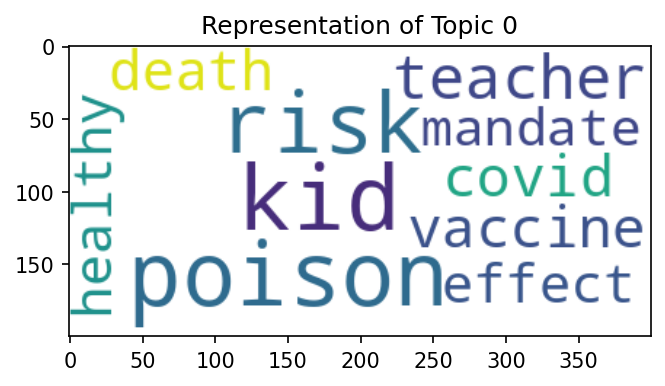

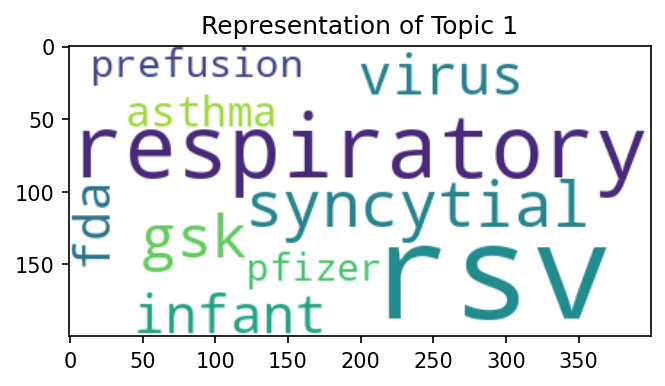

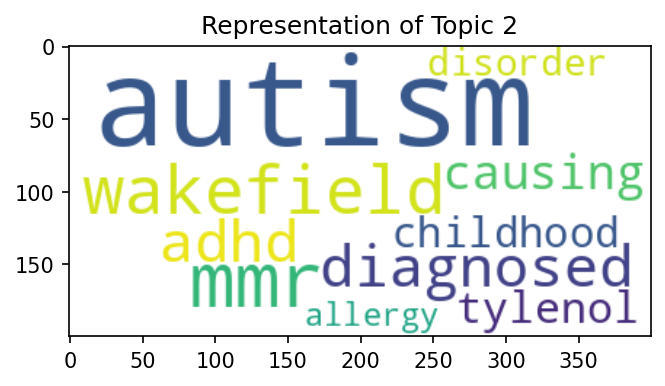

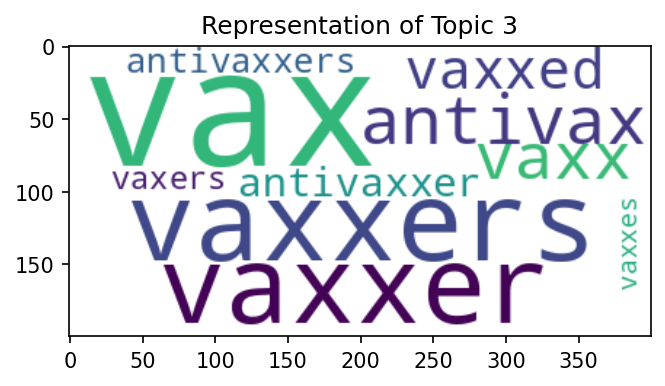

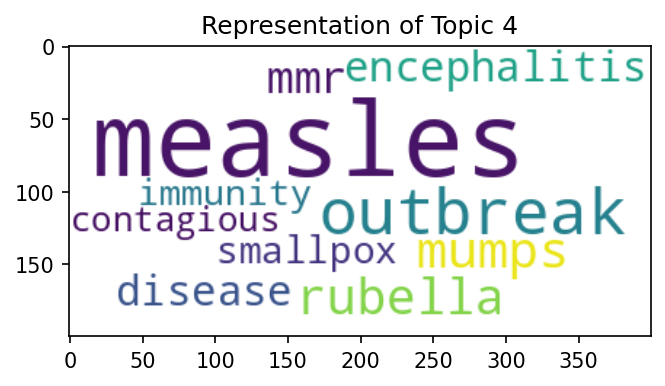

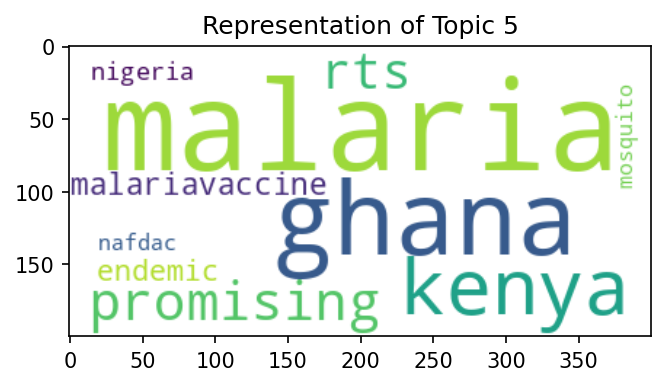

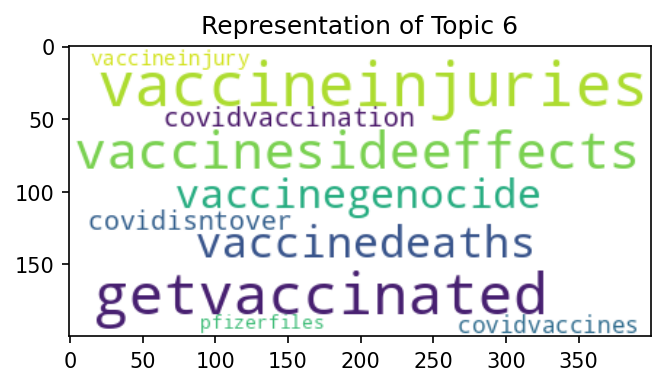

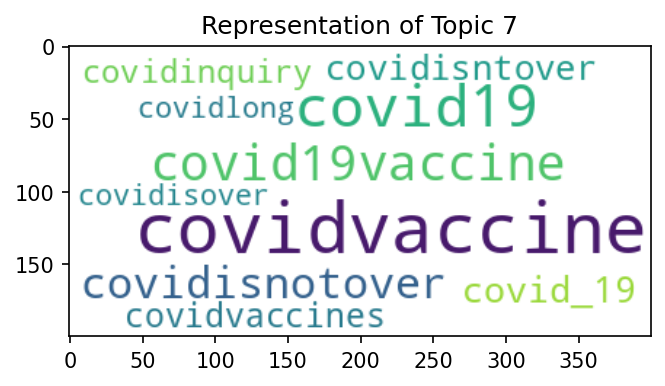

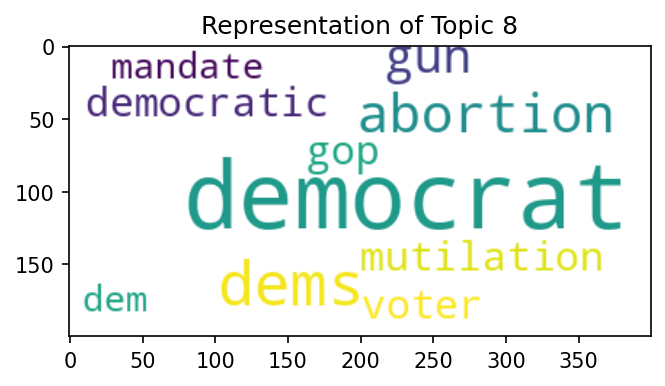

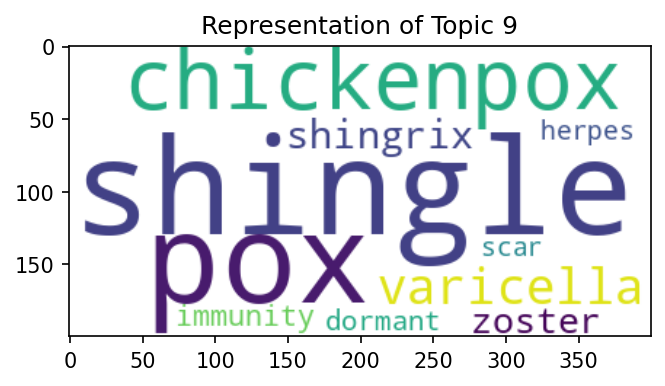

In [95]:
#visualize the top 10 topics
for i in range(0,10):
    create_wordcloud(topic_model, topic=i)

In [96]:
topic_model.visualize_heatmap(top_n_topics=10)

In [97]:
# Extract hierarchical topics and their representations
hierarchical_topics = topic_model.hierarchical_topics(docs)

# Visualize these representations
topic_model.visualize_hierarchy(hierarchical_topics=hierarchical_topics)

100%|██████████| 403/403 [00:29<00:00, 13.45it/s]


In [98]:
topics_over_time = topic_model.topics_over_time(tweet_list, timestamp, nr_bins=20)
topics_over_time

20it [02:05,  6.30s/it]


Topic                                              Words  Frequency  \
0        -1  soda, bacterial, preteenvaxca, biontech, licen...        430   
1         0                 school, kid, poison, death, injury        258   
2         1               gsk, rsv, fda, advisory, respiratory        285   
3         2        autism, wakefield, researched, mmr, mercury         27   
4         3            vax, vaxer, antivaxxers, vaxxer, vaxxes         25   
...     ...                                                ...        ...   
4359    388        reagan, josh, pharmaceutical, injured, 1986          1   
4360    389   pedophile, sexualization, agenda, pedos, station          1   
4361    391         lying, inquiry, ignorance, eradicated, msm          2   
4362    396     nsw, timely, hpv, papillomavirus, immunisation          1   
4363    399                 joan, tnt, bst, documentary, radio          2   

               Timestamp  
0    2023-03-01 22:35:30  
1    2023-03-01 22:35:30  
2    2023-03-01 22:35:30  
3    2023-03-01 22:35:30  
4    2023-03-01 22:35:30  
...                  ...  
4359 2023-04-28 22:45:00  
4360 2023-04-28 22:45:00  
4361 2023-04-28 22:45:00  
4362 2023-04-28 22:45:00  
4363 2023-04-28 22:45:00  

[4364 rows x 4 columns]

In [99]:
topic_model.visualize_topics_over_time(topics_over_time, title = '<b>Representation of Topics over Time</b>',height = 450, width = 850)

In [100]:
topic_model.visualize_topics_over_time(topics_over_time, top_n_topics=10)

In [102]:
#topic_model.visualize_topics_over_time(topics_over_time, title = '<b>Representation of Topics over Time</b>', normalize_frequency= True,height = 450, width = 850)